In [1]:
def closure_of_generators(gens, symbolic=False):
    elts = copy(gens)
    new = copy(gens)

    while true:
        new1 = [ ]
        for u in new:
            for v in gens:
                tmp = u * v
                if symbolic:
                    tmp = tmp.apply_map(simplify)
                    tmp = tmp.apply_map(expand)
                if not tmp in elts:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(elts),len(new1))
            print('----------------')
            elts = elts+new1
            new = copy(new1)
    print('This is a group with ', len(elts), ' elements')
    return elts

def reflection_matrix(v, normalize=True, symbolic=False):
    """
    Return the reflection matrix to the plane with normal vector v
    
    INPUT:
    
      - ``v`` -- vector or any iterable that can be turned into a vector
      - ``normalize`` -- boolean (default: True)
      
    If ``normalize`` is ``False``, assume the vector is a unit vector and avoid normalizing.

    EXAMPLE:
    
        sage: a, b, c = SR.var("a b c")
        sage: A = reflection_matrix((a, b, c))
        sage: A
        [-a^2 + b^2 + c^2           -2*a*b           -2*a*c]
        [          -2*a*b  a^2 - b^2 + c^2           -2*b*c]
        [          -2*a*c           -2*b*c  a^2 + b^2 - c^2]
    """
    v = vector(v)
    m = matrix(v)
    n = len(v)
    R = v.base_ring() 
    if normalize:
        output =identity_matrix(n) - 2/v.dot_product(v) * m.transpose() * m
    output = v.dot_product(v) * identity_matrix(n) - 2 * m.transpose() * m
    if symbolic:
        output = output.apply_map(expand)
    return output



n1, n2, n3 = SR.var("n1 n2 n3")

A=reflection_matrix([n1, n2, n3])

factor(A.trace()),factor(A.determinant())


r = reflection_matrix


def take_group_orbit(seed_vector, group, symbolic=False):
    orbit = [ seed_vector ]
    new   = [ seed_vector ]
    while true:
        new1 = [ ]
        for g in group:
            tmp = g * seed_vector
            if symbolic:
                tmp = tmp.apply_map(simplify)
                tmp = tmp.apply_map(expand)
            if not tmp in orbit:
                if not tmp in new1:
                    new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(orbit),len(new1))
            print('----------------')
            orbit = orbit + new1
            new = copy(new1)
    return(orbit)

def find_edges_for_vertices(vertices):

    dist_set = set([])

    for i in range(0,1):
        for j in range(0,len(vertices)):
            dist_set.add(expand(norm(vector(vertices[i])-vector(vertices[j]))))
        
    min_dist = min(dist_set.difference({0}))
    print('shortest edge length: ', min_dist)

    adj=[]
    for i in range(0,len(vertices)):
        adj.append([])
        for j in range(i,len(vertices)):
            if expand(norm(vector(vertices[i])-vector(vertices[j]))) == min_dist:
                adj[i].append(j)

    edges = []
    for i in range(0,len(adj)):
        for j in range(0,len(adj[i])):
            edges.append( line3d( [vertices[i], vertices[adj[i][j]]], thickness=10) )

    print(len(edges))        
    return edges

# define Cartan matrix - function of arbitrary number of vectors?

# find eigenvalues using SAGE routine

# find the Perron-Frobenius eigenvalue

def Cartan_matrix(Delta, symbolic=False):
    """
    Return the Cartan matrix for a simple system
    
    INPUT:
    
    - `Delta` -- list of vectors or any iterable that can be turned into a vector
    - 

    EXAMPLES::

        sage: Delta = ((1, 0, 0)), ((0, 1, 0)), ((0, 0, 1))
        sage: C = Cartan_matrix(Delta)
        sage: C
        [2 0 0]
        [0 2 0]
        [0 0 2]
    """
    Delta=[vector(v) for v in Delta]

    M = matrix([[2 / w.dot_product(w) * v.dot_product(w) for w in Delta] for v in Delta])
    
    if symbolic:
        M = M.apply_map(expand)
        
    return M

def closure_of_roots(simples, symbolic=False):
    simple_roots = [vector(a) for a in simples]
    roots = copy(simple_roots)
    new = copy(simple_roots)
    simple_refs = [reflection_matrix(a,True,True) for a in simple_roots]
    while true:
        new1 = [ ]
        for u in new:
            for v in simple_refs:
                tmp = v * u
                if symbolic:
                    tmp = tmp.apply_map(expand)
                if not tmp in roots:
                    if not tmp in new1:
                        new1.append(tmp)
        if new1 == [ ]:
            break
        else:
            print(len(roots),len(new1))
            print('----------------')
            roots = roots+new1
            new = copy(new1)
    print('This is a root system with ', len(roots), ' roots')
    return roots


def find_dual_basis(simple_roots):
    sr = copy(simple_roots)
    M = matrix([vector(a) for a in sr])
    Mt = M.transpose()
    Momega=Mt.inverse()
    Momega=Momega.apply_map(expand)
    Momega=Momega.apply_map(simplify)
    Momega=Momega.apply_map(float)

    return Momega





In [2]:
def take_complement(sub, main):
    comp = copy(main)
    for i in sub:
        for j in (comp):
            if float(norm (vector(i) -vector(j)))<0.001:
                comp.remove(j)
                break
    return(comp)


In [3]:
def plot_projected(vertices, black_vector, white_vector, d2d3, edges, filepath1='CoxPl_inH4.png', filepath2='CoxPl_inH4_poly.png'):

    if d2d3=='3D':
        vertices_proj=[[root.dot_product(black_vector), root.dot_product(white_vector), 0] for root in vertices]
        plot = point3d(vertices_proj, color = 'blue', size=20, aspect_ratio=1, ticks=[[],[]],axes=False)
        polyhedron = point3d(vertices_proj, size=10, aspect_ratio=1, ticks=[[],[]],axes=False)
    if d2d3=='2D':
        vertices_proj=[[root.dot_product(black_vector), root.dot_product(white_vector)] for root in vertices]
        plot = point2d(vertices_proj, color = 'blue', size=20, aspect_ratio=1, ticks=[[],[]],axes=False)
        polyhedron = point2d(vertices_proj, size=20, aspect_ratio=1, ticks=[[],[]],axes=False)
    
    if edges == True:
        dist_set = set([])

        for i in range(0,1):
            for j in range(0,len(vertices)):
                dist_set.add(expand(norm(vector(vertices[i])-vector(vertices[j]))))
        
        min_dist = min(dist_set.difference({0}))
        #print('shortest edge length: ', min_dist)

        adj=[]
        for i in range(0,len(vertices)):
            adj.append([])
            for j in range(i,len(vertices)):# This is a bit naughty because it calculates an asymmetric adjacency so we don't double count edges later!!
                if expand(norm(vector(vertices[i])-vector(vertices[j]))) == min_dist:
                    adj[i].append(j)

        edges = []
        for i in range(0,len(adj)):
            for j in range(0,len(adj[i])):
                if d2d3=='3D':
                    edges.append( line3d( [vertices_proj[i], vertices_proj[adj[i][j]]], thickness=1) )
                if d2d3=='2D':
                    edges.append( line2d( [vertices_proj[i], vertices_proj[adj[i][j]]], thickness=1) )

        #print(len(edges))

        #print(len(adj[1]))
        for edge in edges:
            polyhedron = polyhedron + edge
        show(polyhedron)
        plot.save(filepath1,dpi=400)
        polyhedron.save(filepath2,dpi=400)

    return(plot)



# Set up the relevant root systems

In [4]:
tau=1/2*(1+sqrt(5))
sig=1/2*(1-sqrt(5))
roots = [(0, 1, 0), (-tau/2, -1/2, -1/2*(tau-1)), (1, 0, 0)]
Delta_H3 = closure_of_roots(roots,True)
print(len(Delta_H3))

3 6
----------------
9 6
----------------
15 5
----------------
20 4
----------------
24 3
----------------
27 2
----------------
29 1
----------------
This is a root system with  30  roots
30


In [5]:
roots = [(-sig/2, -tau/2, 0, -1/2), (0, -sig/2,-tau/2, 1/2), (0, 1/2, -sig/2, -tau/2), (0, -1/2, -sig/2, tau/2)]
Delta_H4 = closure_of_roots(roots,True)
print(len(Delta_H4))

4 8
----------------
12 8
----------------
20 8
----------------
28 8
----------------
36 8
----------------
44 8
----------------
52 7
----------------
59 6
----------------
65 6
----------------
71 6
----------------
77 6
----------------
83 6
----------------
89 5
----------------
94 4
----------------
98 4
----------------
102 4
----------------
106 3
----------------
109 2
----------------
111 2
----------------
113 2
----------------
115 2
----------------
117 2
----------------
119 1
----------------
This is a root system with  120  roots
120


In [6]:
Cartan_matrix(roots, True)

[                 2                 -1                  0                  0]
[                -1                  2                 -1                  0]
[                 0                 -1                  2 -1/2*sqrt(5) - 1/2]
[                 0                  0 -1/2*sqrt(5) - 1/2                  2]

In [7]:
H2_roots = [ (0, 1/2, -sig/2, -tau/2), (0, -1/2, -sig/2, tau/2), ( -sig/2, -tau/2, 0, -1/2), ( -sig/2, tau/2,0, +1/2)]

Delta_H2 = closure_of_roots(H2_roots,True)
print(len(Delta_H2))

4 8
----------------
12 6
----------------
18 2
----------------
This is a root system with  20  roots
20


In [8]:
Grand_Antiprism = take_complement(Delta_H2, Delta_H4) 


In [9]:
len(Grand_Antiprism)

100

# Preparing the Coxeter plane for visualisation

Be careful that some code is repeated for the different cases, and has slightly confusing variable names with respect to some of the examples. But it is the same procedure and could perhaps have better been turned into a function. 

In [10]:
C_H4 = Cartan_matrix(roots, True)

Omega_H4 = find_dual_basis(roots)

print(simplify(Omega_H4))


[3.2360679774997894                0.0                0.0                0.0]
[5.8541019662496865  1.618033988749893                0.0 0.9999999999999998]
[  8.47213595499958  2.618033988749894 1.6180339887498945 0.9999999999999997]
[ 6.854101966249681  1.618033988749894 1.6180339887498942 1.6180339887498945]


In [11]:
Maple_evec = vector([4+4*sqrt(5), 2*sqrt(7+sqrt(30+6*sqrt(5))+sqrt(5))*(1+sqrt(5)), sqrt(30+6*sqrt(5))*sqrt(5)+4*sqrt(5)+sqrt(30+6*sqrt(5))+8, (sqrt(5)+sqrt(30+6*sqrt(5))-1)*sqrt(7+sqrt(30+6*sqrt(5))+sqrt(5))])

Maple_eval = 2-(1/2)*sqrt(7+sqrt(30+6*sqrt(5))+sqrt(5))

tmp = C_H4*Maple_evec-Maple_eval*Maple_evec
tmp = tmp.apply_map(expand)
print(tmp)

(0, 0, 0, 0)


In [12]:
# find partition of roots
PF_vec = Maple_evec #PF_vec =vector([0.371748034514429893,0.707106781320503752,0.601500954816544975])#cheat


#could also define a function - do by hand for now!
roots_black_H4 = [0,2]
roots_white_H4 = [1,3]

black_vector_H4 = vector([0,0,0,0])
white_vector_H4 = vector([0,0,0,0])

for i in roots_black_H4:
    black_vector_H4 = black_vector_H4  +PF_vec[i]*Omega_H4[i]

for i in roots_white_H4:
    white_vector_H4 = white_vector_H4+PF_vec[i]*Omega_H4[i]

#these two vectors define the Coxeter plane. Now turn them into a Cartesian coordinate system there

#normalise
black_vector_H4 =black_vector_H4/(black_vector_H4.norm())
white_vector_H4 =white_vector_H4/(white_vector_H4.norm())

#orthogonalise
black_vector_H4 = black_vector_H4 - (black_vector_H4.dot_product(white_vector_H4))*white_vector_H4

#renormalise
black_vector_H4 =black_vector_H4/(black_vector_H4.norm())

#simplify
black_vector_H4 =black_vector_H4.apply_map(expand)
white_vector_H4 =white_vector_H4.apply_map(expand)





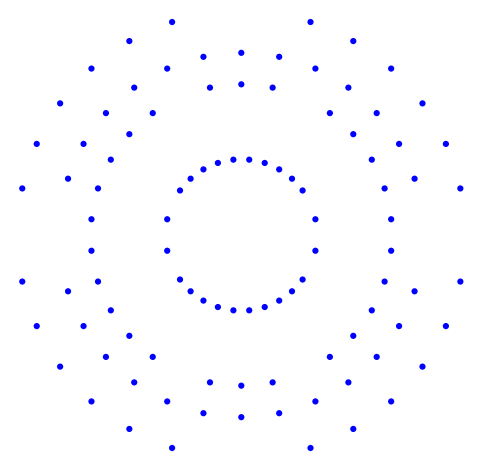

In [13]:
plot_projected(Grand_Antiprism, black_vector_H4, white_vector_H4, '2D', False)

In [14]:
plot_projected(Delta_H2, black_vector_H4, white_vector_H4, '3D', False)

Graphics3d Object

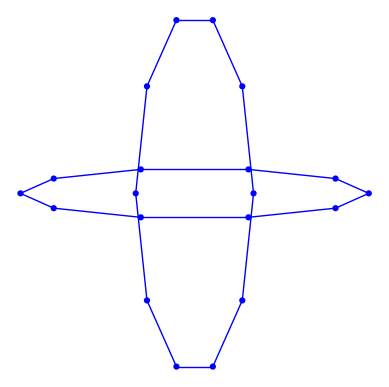

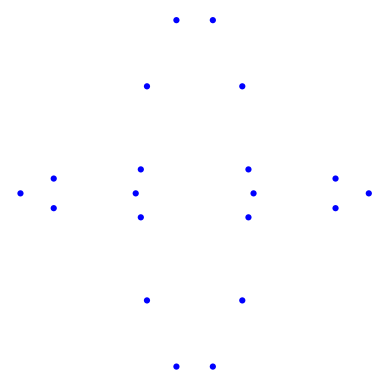

In [15]:
plot_projected(Delta_H2, black_vector_H4, white_vector_H4, '2D', True, filepath1='CoxPl_H2_inH4.png', filepath2='CoxPl_H2_inH4_poly.png')

In [16]:
plot_projected(Delta_H2, black_vector_H4, white_vector_H4, '3D', True)

Graphics3d Object

Graphics3d Object

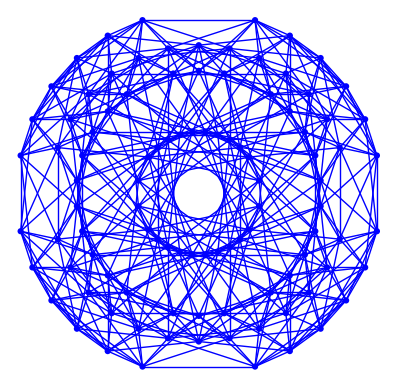

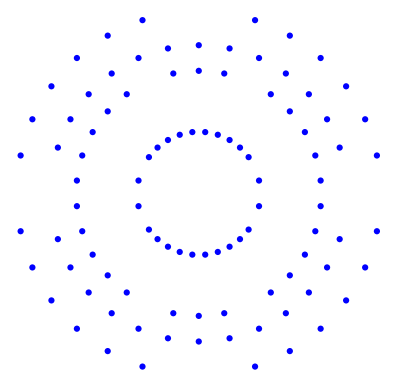

In [17]:
plot_projected(Grand_Antiprism, black_vector_H4, white_vector_H4, '2D', True, filepath1='CoxPl_GA_inH4.png', filepath2='CoxPl_GA_inH4_poly.png')

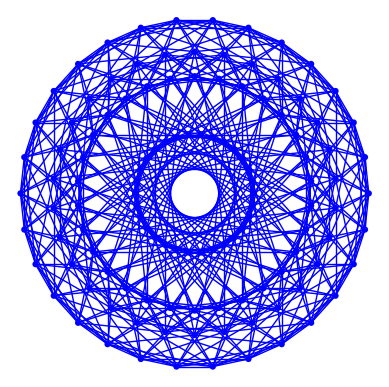

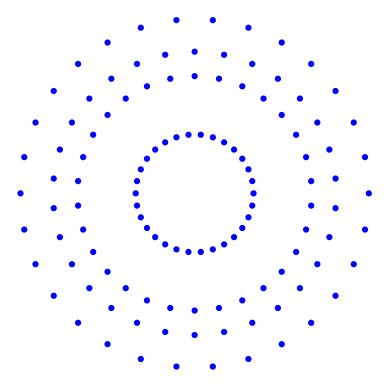

In [19]:

plot_projected(Delta_H4, black_vector_H4, white_vector_H4, '2D', True, filepath1='CoxPl_H4_inH4.png', filepath2='CoxPl_H4_inH4_poly.png')

# $A_2$ case

In [20]:
A2_roots = [ (-sig/2, -tau/2, 0, -1/2), (0, -sig/2,-tau/2, 1/2),
(0, -1/2, 1/4*sqrt(5) - 1/4, 1/4*sqrt(5) + 1/4),
(1/4*sqrt(5) + 1/4, 1/2, 0, -1/4*sqrt(5) + 1/4)]
Delta_A2 = closure_of_roots(A2_roots,True)
print(len(Delta_A2))

4 6
----------------
10 2
----------------
This is a root system with  12  roots
12


In [21]:
for i in (Delta_H4):
    orth = 0
    for j in (Delta_A2):
        tmp = (vector(i)).dot_product(vector(j))
        tmp = simplify(tmp)
        tmp = expand(tmp)
        if not float(norm (tmp))<0.0001:
            orth = 1
    if orth == 0:
        print(i)
    

In [22]:
Grand_A2prism = take_complement(Delta_A2, Delta_H4) 


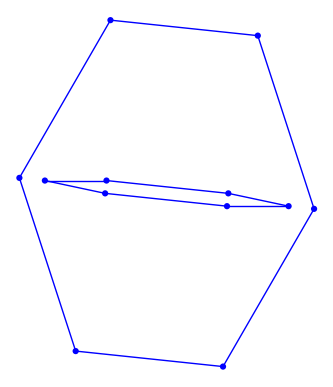

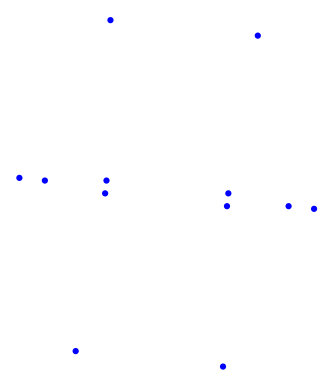

In [23]:
plot_projected(Delta_A2, black_vector_H4, white_vector_H4, '2D', True, filepath1='CoxPl_A2_inH4.png', filepath2='CoxPl_A2_inH4_poly.png')

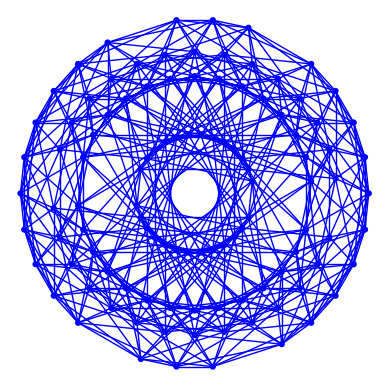

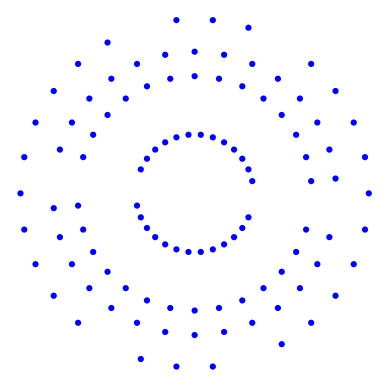

In [24]:
plot_projected(Grand_A2prism, black_vector_H4, white_vector_H4, '2D', True, filepath1='CoxPl_Grand_A2prism_inH4.png', filepath2='CoxPl_Grand_A2prism_inH4_poly.png')

# $D_4$ and the snub 24-cell

In [25]:
D4_roots = [ [1, 0, 0, 0],
[-1/2, 1/2*sig, 0, 1/2*tau],
[-1/2, -1/2, -1/2, -1/2],
[-1/2, -1/2*tau, -1/2*sig, 0]
]

Delta_D4 = closure_of_roots(D4_roots,True)
print(len(Delta_D4))

4 11
----------------
15 6
----------------
21 3
----------------
This is a root system with  24  roots
24


In [26]:
Grand_2Tprism = take_complement(Delta_D4, Delta_H4) 

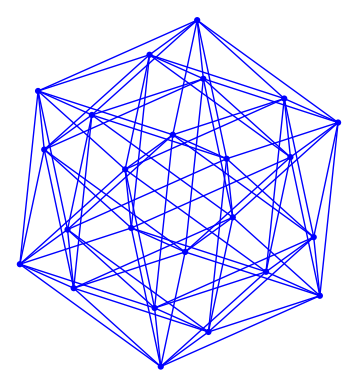

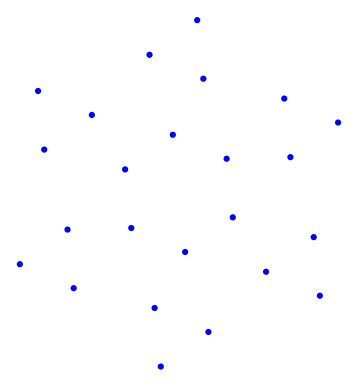

In [27]:
plot_projected(Delta_D4, black_vector_H4, white_vector_H4, '2D', True,filepath1='CoxPl_D4_inH4.png', filepath2='CoxPl_D4_inH4_poly.png')

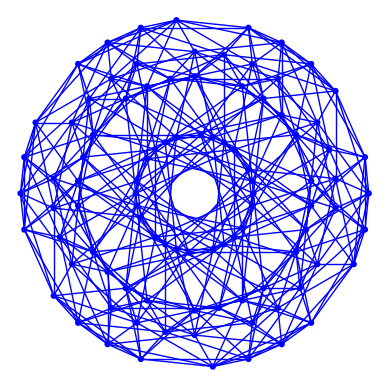

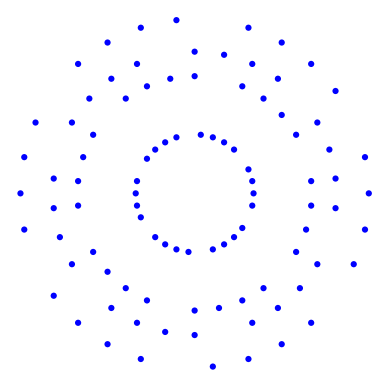

In [28]:
plot_projected(Grand_2Tprism, black_vector_H4, white_vector_H4, '2D', True,filepath1='CoxPl_CD4_inH4.png', filepath2='CoxPl_CD4_inH4_poly.png')

# $A_4$ case

In [29]:
A4QM=[(-1/4*sqrt(5) + 1/4, -1/4*sqrt(5) - 1/4, 0, 1/2), (1/4*sqrt(5) - 1/4, 1/4*sqrt(5) + 1/4, 0, 1/2), (-1/4*sqrt(5) - 1/4, 0, -1/4*sqrt(5) + 1/4, -1/2), (1/4*sqrt(5) + 1/4, -1/4*sqrt(5) + 1/4, -1/2, 0)]

In [30]:
Delta_A4 = closure_of_roots(A4QM,True)
print(len(Delta_A4))

4 7
----------------
11 5
----------------
16 3
----------------
19 1
----------------
This is a root system with  20  roots
20


In [31]:
Cartan_matrix(A4QM).apply_map(expand)

[ 2 -1  0  0]
[-1  2 -1  0]
[ 0 -1  2 -1]
[ 0  0 -1  2]

In [33]:
Grand_A4prism =take_complement(Delta_A4, Delta_H4)

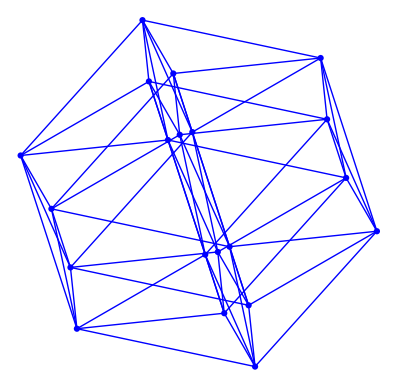

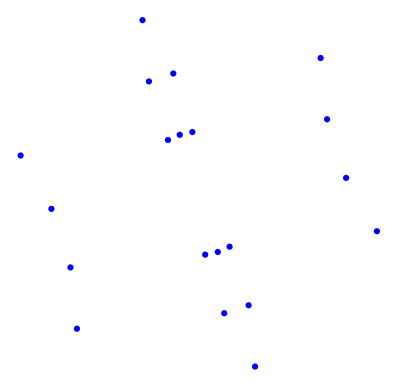

In [34]:
plot_projected(Delta_A4, black_vector_H4, white_vector_H4, '2D', True,filepath1='CoxPl_CA4_inH4.png', filepath2='CoxPl_CA4_inH4_poly.png')

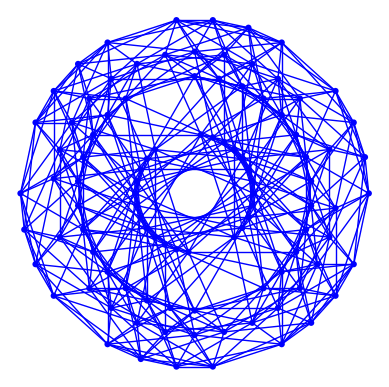

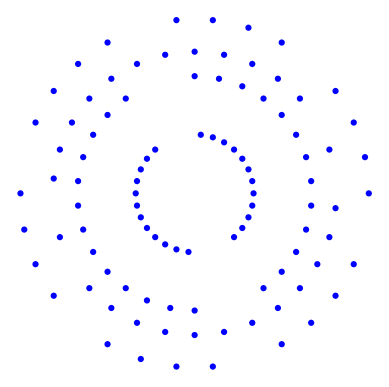

In [35]:
plot_projected(Grand_A4prism, black_vector_H4, white_vector_H4, '2D', True)

# $A_1^4$ case

In [36]:
Delta_A14 = closure_of_roots([(1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0), (0, 0, 0, 1)],True)
print(len(Delta_A14))

4 4
----------------
This is a root system with  8  roots
8


In [37]:
Grand_A14prism = take_complement(Delta_A14, Delta_H4) 


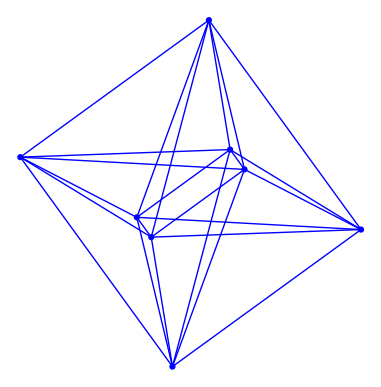

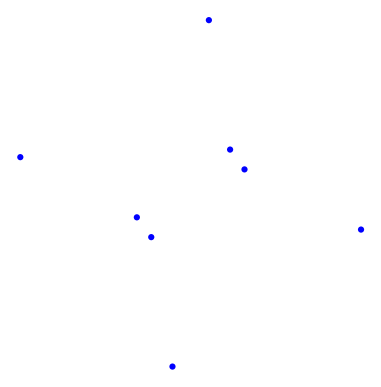

In [38]:
plot_projected(Delta_A14, black_vector_H4, white_vector_H4, '2D', True,filepath1='CoxPl_A14_inH4.png', filepath2='CoxPl_A14_inH4_poly.png')

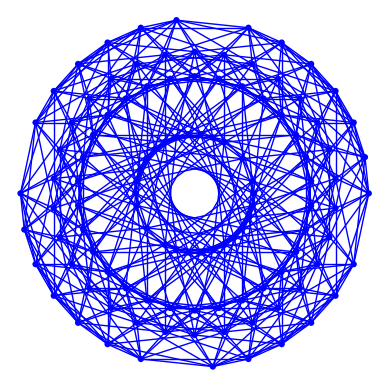

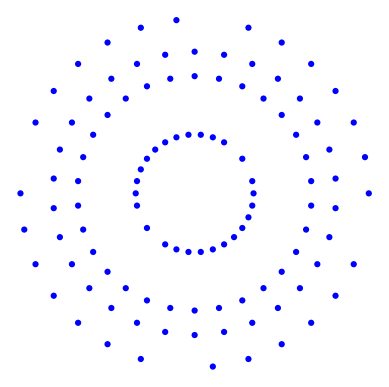

In [39]:
plot_projected(Grand_A14prism, black_vector_H4, white_vector_H4, '2D', True,filepath1='CoxPl_CA14_inH4.png', filepath2='CoxPl_CA14_inH4_poly.png')